In [2]:
!pip install facenet-pytorch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 10.8 MB/s eta 0:00:00


In [10]:
import os
import matplotlib.pyplot as plt
from PIL import Image
from facenet_pytorch import MTCNN, InceptionResnetV1
import torch
from torchvision import transforms
from scipy.spatial.distance import euclidean
from google.colab import drive

In [12]:
print(os.getcwd())

/content


In [34]:
![picture](https://drive.google.com/file/d/10g5Qo1PYqV0pedp_8aWRZDn73ZO8fGm9/view?usp=drive_link)

/bin/bash: -c: line 1: syntax error near unexpected token `https://drive.google.com/file/d/10g5Qo1PYqV0pedp_8aWRZDn73ZO8fGm9/view?usp=drive_link'
/bin/bash: -c: line 1: `[picture](https://drive.google.com/file/d/10g5Qo1PYqV0pedp_8aWRZDn73ZO8fGm9/view?usp=drive_link)'


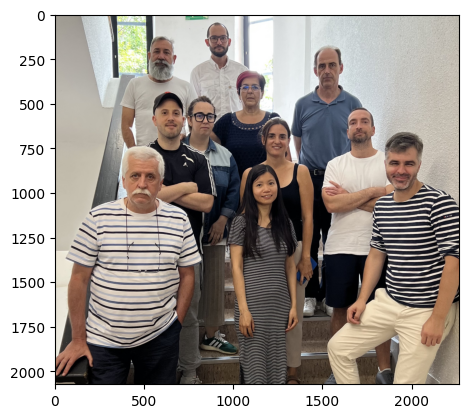

In [35]:
# open method used to open different extension image file
img = Image.open('//content/drive/MyDrive/Inteligencia Artificial/00_CURSOS/02_Especialista_en_Inteligencia_Artificial/photo.jpg')
# This method will show image in any image viewer
plt.imshow(img);

Distancia entre cara 1 y cara 2: 1.1801
Distancia entre cara 1 y cara 3: 1.3366
Distancia entre cara 2 y cara 3: 1.5122
Encodings de las caras:
tensor([[ 1.2209e-02,  2.4464e-02,  1.9859e-03,  6.0858e-02, -3.1520e-02,
          2.0316e-02, -7.5789e-02,  2.8722e-02, -6.2701e-03,  5.5390e-02,
          4.6224e-02,  1.4666e-02,  3.4831e-02, -4.1205e-02, -3.9900e-03,
         -3.5726e-02, -7.9396e-02, -4.0273e-02,  1.6743e-02,  9.7582e-03,
         -2.4526e-02, -1.5870e-02, -6.7942e-02, -1.6154e-02,  2.5852e-03,
          2.7982e-02, -1.7874e-02,  2.5922e-02, -3.7368e-02,  1.7630e-03,
         -3.7941e-02, -1.3012e-02, -6.0064e-02,  9.4464e-03, -8.2295e-02,
         -9.2205e-03,  5.0030e-02, -2.0246e-02,  6.0351e-03,  5.0326e-03,
         -2.0704e-02,  1.3286e-01,  3.6439e-02,  3.4260e-02,  4.7032e-02,
          7.1929e-02,  1.7833e-02, -1.8966e-02,  1.2092e-02, -6.0792e-02,
          2.0034e-02, -5.4450e-02, -1.3737e-02,  2.7666e-02,  2.5928e-03,
          2.0344e-02,  7.0560e-03, -3.5242

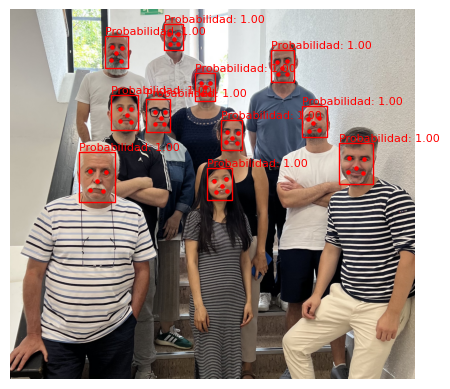

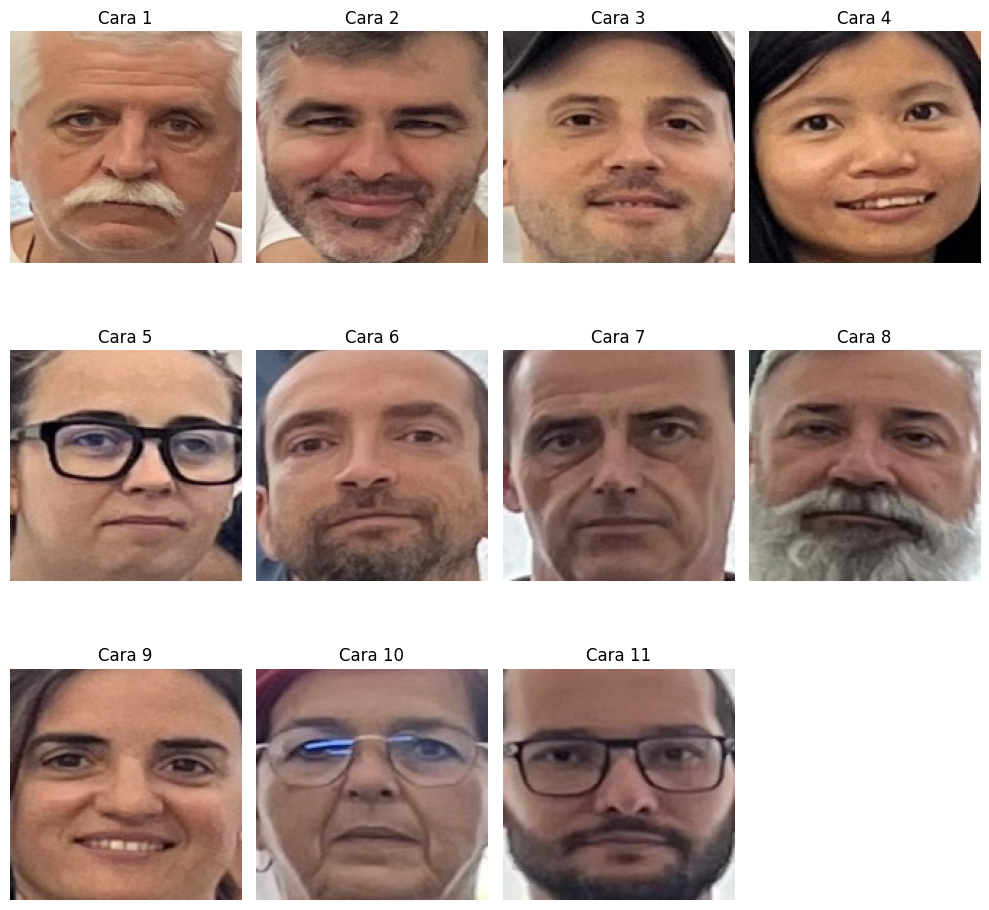

In [42]:
#Programa de reconocimiento facial

def mtcnn_face_detector(img):
    mtcnn = MTCNN(
        keep_all=True, # Utilizamos keep_all=True para obtener todas las caras detectadas
        min_face_size = 20,
        # threshold     = [0.6, 0.7, 0.7],
        post_process  = False,
        image_size    = 160,
        # device        = device
    )
    img = Image.open(img)
    boxes, probs, landmarks = mtcnn.detect(img, landmarks=True)

    return img, boxes, probs, landmarks

def extract_faces(image_path):
    mtcnn = MTCNN(keep_all=True)  # Utilizamos keep_all=True para obtener todas las caras detectadas
    img = Image.open(image_path)
    face_tensors = mtcnn(img)  # Usamos la función mtcnn directamente para obtener las caras extraídas

    return face_tensors

def get_embeddings(face_tensors):
    # Cargar el modelo InceptionResnetV1 preentrenado con 'vggface2'
    resnet = InceptionResnetV1(pretrained='vggface2').eval()

    # Preprocesar los tensores de las caras para adaptarlos al modelo
    preprocessed_faces = torch.stack([transforms.Resize((160, 160))(face) for face in face_tensors])

    # Obtener los embeddings utilizando el modelo InceptionResnetV1
    with torch.no_grad():
        embeddings = resnet(preprocessed_faces)

    return embeddings

ruta_img = "/content/drive/MyDrive/Inteligencia Artificial/00_CURSOS/02_Especialista_en_Inteligencia_Artificial/photo.jpg"

img_grupo, caras_detectadas, probabilidades, landmarks = mtcnn_face_detector(ruta_img)

plt.imshow(img_grupo)
plt.axis("off")

if caras_detectadas is not None:
    for box, probs, landmark in zip(caras_detectadas, probabilidades, landmarks):
        x, y, w, h = box
        rect = plt.Rectangle((x, y), w - x, h - y, linewidth=1, edgecolor='r', facecolor='none')
        plt.gca().add_patch(rect)

        # Mostrar la probabilidad de que la bounding box contenga una cara
        plt.text(x, y - 10, f"Probabilidad: {probs:.2f}", color='red', fontsize=8)

        # Mostrar las coordenadas de los ojos, nariz y comisura de la boca en cada cara detectada
        for (x, y) in landmark:
            plt.scatter(x, y, s=5, c='red')

# Tarea 6: Extracción de caras utilizando el método forward() y mostrarlas en pantalla
face_tensors = extract_faces(ruta_img)

# Calcular el número de filas y columnas para la cuadrícula de subfiguras
num_faces = len(face_tensors)
rows = int(num_faces ** 0.5)
cols = (num_faces + rows - 1) // rows

# Crear la cuadrícula de subfiguras y mostrar las caras extraídas
fig, axes = plt.subplots(rows, cols, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    if i < num_faces:
        face_tensor = face_tensors[i]
        face_img = face_tensor.permute(1, 2, 0).numpy()  # Convertir el tensor a una imagen numpy
        face_img = (face_img - face_img.min()) / (face_img.max() - face_img.min())  # Escalar los valores de los píxeles al rango [0, 1]
        ax.imshow(face_img)
        ax.axis('off')
        ax.set_title(f"Cara {i+1}")

# Eliminar subfiguras vacías si hay menos caras que subfiguras
for i in range(num_faces, rows * cols):
    fig.delaxes(axes.flatten()[i])

# Tarea 8: Obtener los encodings de todas las caras de la imagen
embeddings = get_embeddings(face_tensors)

# Calcular las distancias entre embeddigns de tres caras de tres personas de clase
if num_faces >= 3:
    # Indices de las caras seleccionadas (por ejemplo, las primeras tres)
    idx_1, idx_2, idx_3 = 0, 1, 2

    embedding_1, embedding_2, embedding_3 = embeddings[idx_1], embeddings[idx_2], embeddings[idx_3]

    # Calcular las distancias euclidianas entre los embeddings selccionados
    distance_1_2 = euclidean(embedding_1.numpy(), embedding_2.numpy())
    distance_1_3 = euclidean(embedding_1.numpy(), embedding_3.numpy())
    distance_2_3 = euclidean(embedding_2.numpy(), embedding_3.numpy())

    print(f"Distancia entre cara 1 y cara 2: {distance_1_2:.4f}")
    print(f"Distancia entre cara 1 y cara 3: {distance_1_3:.4f}")
    print(f"Distancia entre cara 2 y cara 3: {distance_2_3:.4f}")


# Imprimir todos los embeddings
torch.set_printoptions(threshold=10000)
print("Encodings de las caras:")
print(embeddings)

plt.tight_layout()
plt.show()


names = ["peio", "andoni", "egoitz", "sylvie", "nerea", "sergio", "oscar", "juancar", "fátima", "marijose", "alberto"]

name_encode = {}

i = 0

for emb in embeddings:
    name_encode[names[i]] = emb
    i=i+1



In [43]:
print(name_encode)

{'peio': tensor([ 0.0122,  0.0245,  0.0020,  0.0609, -0.0315,  0.0203, -0.0758,  0.0287,
        -0.0063,  0.0554,  0.0462,  0.0147,  0.0348, -0.0412, -0.0040, -0.0357,
        -0.0794, -0.0403,  0.0167,  0.0098, -0.0245, -0.0159, -0.0679, -0.0162,
         0.0026,  0.0280, -0.0179,  0.0259, -0.0374,  0.0018, -0.0379, -0.0130,
        -0.0601,  0.0094, -0.0823, -0.0092,  0.0500, -0.0202,  0.0060,  0.0050,
        -0.0207,  0.1329,  0.0364,  0.0343,  0.0470,  0.0719,  0.0178, -0.0190,
         0.0121, -0.0608,  0.0200, -0.0545, -0.0137,  0.0277,  0.0026,  0.0203,
         0.0071, -0.0352, -0.0921, -0.0424,  0.0103,  0.0725, -0.0716, -0.0652,
         0.0272,  0.0497,  0.0107,  0.0032,  0.0090,  0.0184,  0.0918,  0.0562,
        -0.0659,  0.0240,  0.0384, -0.0046, -0.0345,  0.0746, -0.0473, -0.0330,
         0.0621,  0.0574,  0.0547, -0.0364, -0.0368,  0.0541, -0.0525, -0.0427,
         0.0327,  0.0662,  0.0635,  0.0564, -0.0378, -0.0068, -0.0185,  0.0978,
         0.0815, -0.0083, -0.01